In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patient_injuries = pd.read_csv("data/train.csv", index_col=0)

In [22]:
for col in patient_injuries.columns:
    assert ((patient_injuries[col] < 0) | (patient_injuries[col] > 1)).sum() == 0
assert (((patient_injuries["bowel_healthy"] == 0) | (patient_injuries["extravasation_healthy"] == 0) | (patient_injuries["kidney_healthy"] == 0) |
     (patient_injuries["liver_healthy"] == 0) | (patient_injuries["spleen_healthy"] == 0)) != (patient_injuries["any_injury"] == 1)).sum() == 0

In [6]:
patient_injuries

,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
patient_id,,,,,,,,,,,,,,
10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9960,1,0,1,0,1,0,0,1,0,0,1,0,0,0
9961,1,0,1,0,1,0,0,1,0,0,1,0,0,0


In [15]:
def plot_pie(df):
    column_counts = df.sum()
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title("Distribution of Rows Across Columns")
    plt.show()

# Bowel

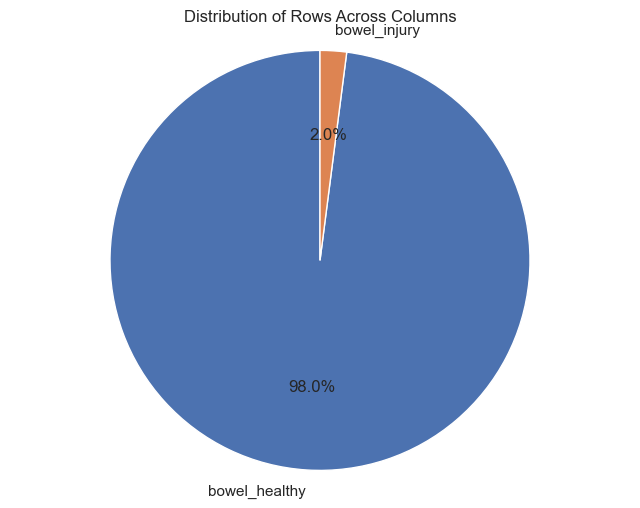

In [16]:
plot_pie(patient_injuries[["bowel_healthy", "bowel_injury"]])

# Extravasation

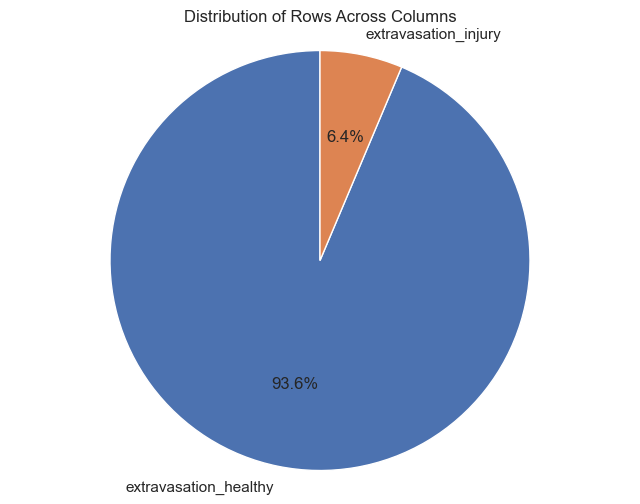

In [17]:
plot_pie(patient_injuries[["extravasation_healthy", "extravasation_injury"]])

# Kidney

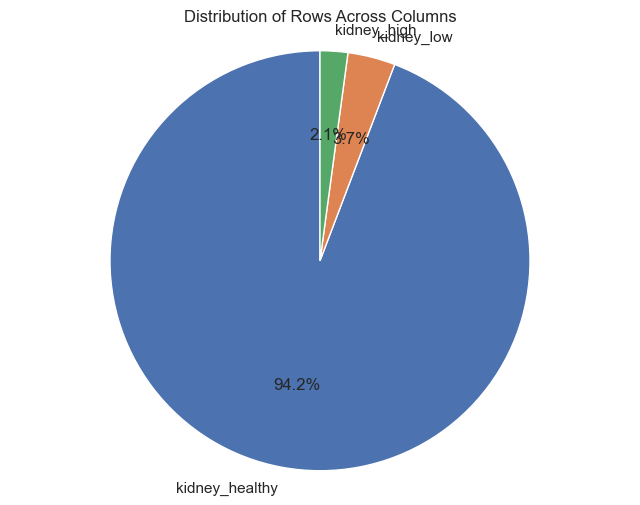

In [18]:
plot_pie(patient_injuries[["kidney_healthy", "kidney_low", "kidney_high"]])

# Liver

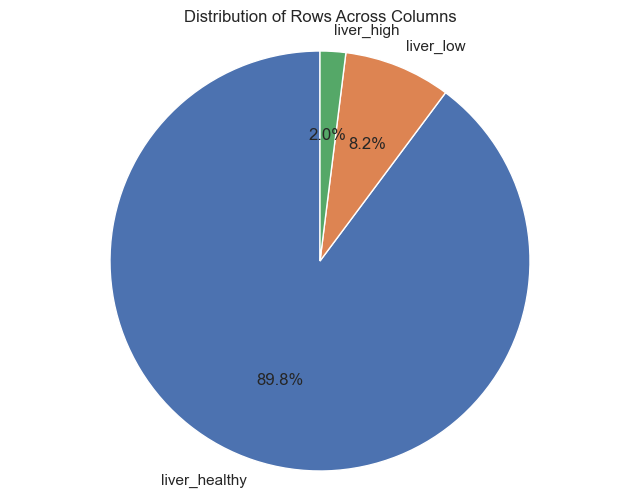

In [19]:
plot_pie(patient_injuries[["liver_healthy", "liver_low", "liver_high"]])

# Spleen

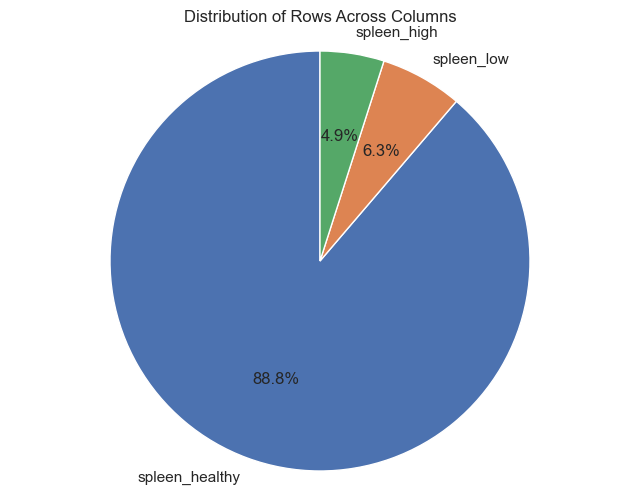

In [20]:
plot_pie(patient_injuries[["spleen_healthy", "spleen_low", "spleen_high"]])

# All injuries

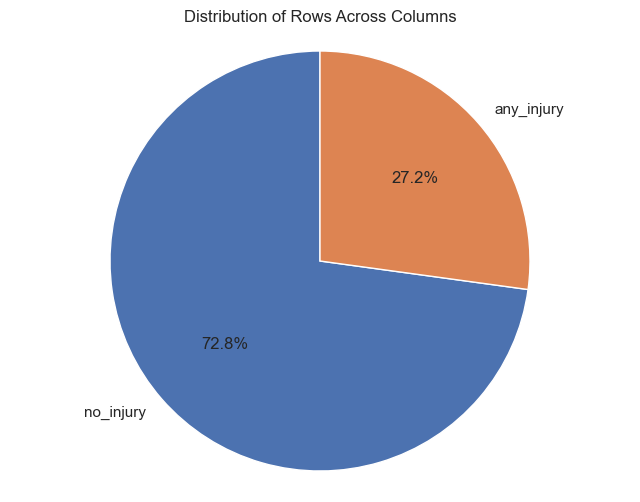

In [24]:
patient_injuries["no_injury"] = 1 - patient_injuries["any_injury"]
plot_pie(patient_injuries[["no_injury", "any_injury"]])

# Series break

In [29]:
series_break = pd.Series(False, index=patient_injuries.index)
with open("not_equally_spaced.txt", "r") as file:
    for line in file:
        not_equal_spaced_instance = line.strip()
        patient_id = int(not_equal_spaced_instance.split(" ")[0])
        series_break.loc[patient_id] = True
patient_injuries["series_break"] = series_break

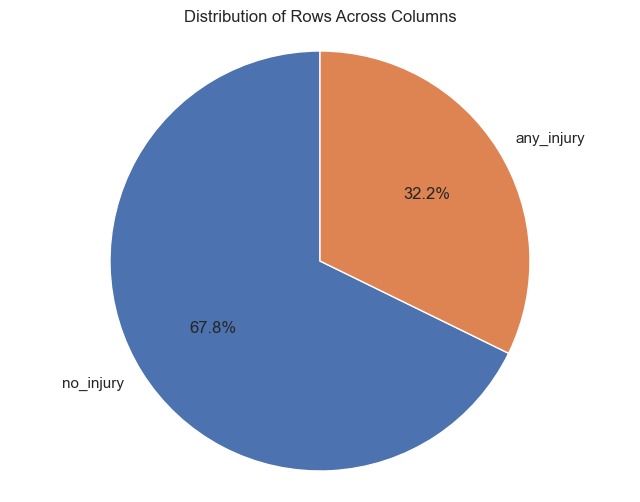

In [33]:
plot_pie(patient_injuries[["no_injury", "any_injury"]].loc[patient_injuries["series_break"] == True])